<center>
<p>
<center>
Universidade Federal de Minas Gerais <br/>
2022/1
</center>
</p>
<h1><b>Análise de dados - Arrecadação de Cfem</b></h1>
<p>

------------------

# Introdução
---------------
Neste projeto é realizada a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [https://dados.gov.br/dados/conjuntos-dados/sistema-arrecadacao]

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais).
O CFEM é um imposto pago pelas empresas ou pessoas físicas a União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.

In [18]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo.
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica.
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    with open(filename, 'r', encoding='ISO-8859-1') as file:

        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes:
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
          # troca , por . na quantidade comercializada e na quantidade de imposto recolhida
            dados[-1][11] = dados[-1][11].replace(',','.')
            dados[-1][9] = dados[-1][9].replace(',','.')
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)

    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("Cfem.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))
print()

# Criando dicionario pra facilitar acesso aos registros
index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

['Ano', 'Mês', 'Processo', 'AnoDoProcesso', 'Tipo_PF_PJ', 'CPF_CNPJ', 'Substância', 'UF', 'Município', 'QuantidadeComercializada', 'UnidadeDeMedida', 'ValorRecolhido'] 

['2002', '8', '910262', '2007', 'PJ', '88503388000194', 'BASALTO', 'RS', 'TRÊS DE MAIO', '0', 'm3 ', '206.41']
Número total de registros: 1967935

{'Ano': 0, 'Mês': 1, 'Processo': 2, 'AnoDoProcesso': 3, 'Tipo_PF_PJ': 4, 'CPF_CNPJ': 5, 'Substância': 6, 'UF': 7, 'Município': 8, 'QuantidadeComercializada': 9, 'UnidadeDeMedida': 10, 'ValorRecolhido': 11}


Evolução da arrecadação no período 2004 - 2021 em MG
---------

O código gera um gráfico com o valor recolhido do CFEM no Estado de Minas Gerais ao longo dos anos (2004 a 2021 em milhões de reais).

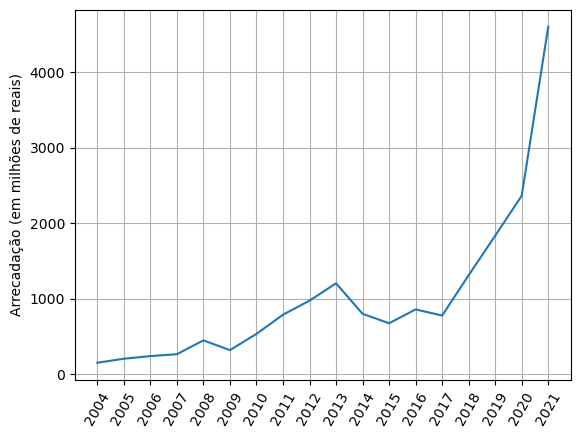

In [47]:
import matplotlib.pyplot as plt

arrecadacao = []
anos = []
soma_ano = 0

for n in range(2004,2022):
  anos.append(n)
  for linha in dados:
    if linha[0]==str(n) and linha[7] == "MG":
      soma_ano = soma_ano+float(linha[11])/1000000
  arrecadacao.append(int(soma_ano))
  soma_ano = 0

plt.plot(anos, arrecadacao)
plt.grid()
plt.xticks(anos)
plt.xticks(anos, rotation=60)

plt.ylabel("Arrecadação (em milhões de reais)")

plt.show()

Extração de bauxita por estado entre 2015 e 2021
---------

O código plota um gráfico de barras que mostra a extração de bauxita (**'BAUXITA'**) por estado brasileiro entre os anos de 2015 e 2021.


**Observação:** Apenas foram considerados os dados em que a UnidadeDeMedida é toneladas.

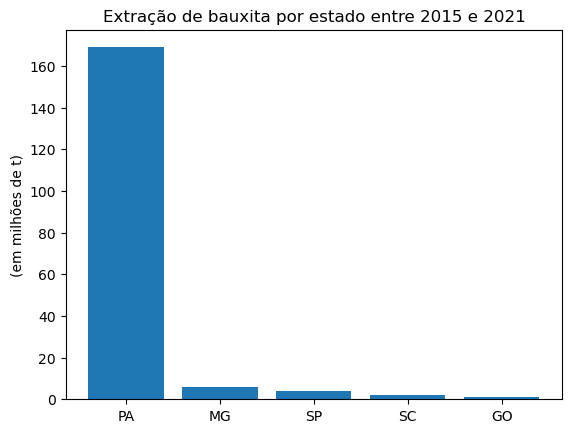

In [44]:
import matplotlib.pyplot as plt
estados = []
extracao = []
soma_estado = 0
dicionario = {}

# CRIANDO UMA LISTA DE ESTADOS:
for linha in dados:
  if linha[7] not in estados and linha[7] != "" and linha[6] == 'BAUXITA' and int(linha[0]) in range(2015,2022):
    estados.append(linha[7])

# DESCOBRINDO A QUANTIDADE DE MINÉRIO EXTRAÍDO E ASSOCIANDO ESSA QUANTIDADE À
# SEU RESPECTIVO ESTADO:
for estado in estados:
  for linha in dados:
    if linha[7] == estado and linha[9] != '' and linha[6] == "BAUXITA" and int(linha[0]) in range(2015,2022) and 't' in linha[10]:
      soma_estado = soma_estado + float(linha[9])
  dicionario[estado] = int(soma_estado/1000000)
  soma_estado = 0

# FILTRANDO O DICIONÁRIO PARA INCLUIR SÓ ESTADOS ONDE A EXTRAÇÃO É DIFERENTE DE
# ZERO E SEPARANDO OS VALORES DO DICIONÁRIO EM UMA LISTA CHAMADA "EXTRAÇÃO":
for n in dicionario.keys():
  if dicionario[n] > 0:
    extracao.append(dicionario[n])

# ORGANIZANDO PARA EXIBIR O GRÁFICO EM ORDEM CRESCENTE DE EXTRAÇÃO:
# PARA FAZER ISSO COLOQUEI EM ORDEM CRESCENTE MINHA LISTA DE VALORES DE EXTRACÃO:
extracao.sort(reverse=1)

# REINICIEI MINHA LISTA DE ESTADOS:
estados = []

# COLOQUEI A LISTA DE ESTADOS DE ACORDO COM A ORDEM DA LISTA DE EXTRACAO (QUE JÁ
# ESTÁ EM ORDEM CRESCENTE POR CULPA DO COMANDO SORT)
# PARA ISSO ATRIBUÍ À LISTA ESTADOS OS VALORES DAS KEYS DO DICIONÁRIO BASEADO
# NOS SEUS VALUES( QUE VEM DA LISTA EXTRACAO):
for n in extracao:
  estados.append(list(dicionario.keys())[list(dicionario.values()).index(n)])

#PLOTANDO O GRÁFICO:
plt.title("Extração de bauxita por estado entre 2015 e 2021")
plt.ylabel("(em milhões de t)")
plt.bar(estados,extracao)
plt.show()

Extração de ouro por estado entre 2011 e 2021
---------

O código gera um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2011 até 2021).


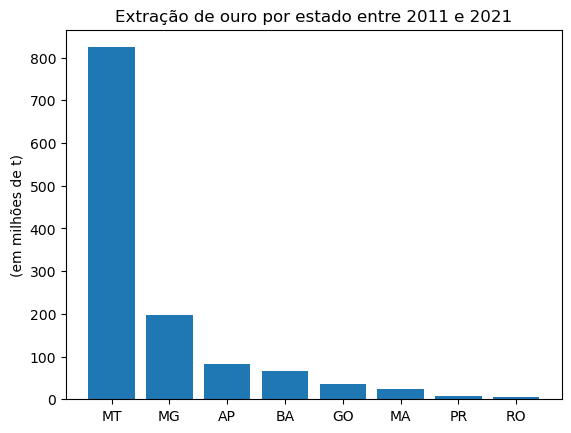

In [46]:
import matplotlib.pyplot as plt
estados = []
extracao = []
soma_estado = 0
dicionario = {}

# CRIANDO UMA LISTA DE ESTADOS:
for linha in dados:
  if linha[7] not in estados and linha[7] != "" and linha[7] != 'OURO' and linha[6] == 'OURO' and int(linha[0]) in range(2011,2022):
    estados.append(linha[7])

# DESCOBRINDO A QUANTIDADE DE MINÉRIO EXTRAÍDO E ASSOCIANDO ESSA QUANTIDADE À
# SEU RESPECTIVO ESTADO:
for estado in estados:
  for linha in dados:
    if linha[7] == estado and linha[9] != '' and linha[9] != 'OURO'and linha[6] == "OURO" and int(linha[0]) in range(2011,2022):
      soma_estado = soma_estado + float(linha[9])
  dicionario[estado] = int(soma_estado/1000000)
  soma_estado = 0

# FILTRANDO O DICIONÁRIO PARA INCLUIR SÓ ESTADOS ONDE A EXTRAÇÃO É DIFERENTE DE
# ZERO E SEPARANDO OS VALORES DO DICIONÁRIO EM UMA LISTA CHAMADA "EXTRAÇÃO":
for n in dicionario.keys():
  if dicionario[n] > 0:
    estados.append(n)
    extracao.append(dicionario[n])

# ORGANIZANDO PARA EXIBIR O GRÁFICO EM ORDEM CRESCENTE DE EXTRAÇÃO:
# PARA FAZER ISSO COLOQUEI EM ORDEM CRESCENTE MINHA LISTA DE VALORES DE EXTRACÃO:
extracao.sort(reverse=1)

# REINICIEI MINHA LISTA DE ESTADOS:
estados = []

# COLOQUEI A LISTA DE ESTADOS DE ACORDO COM A ORDEM DA LISTA DE EXTRACAO (QUE JÁ
# ESTÁ EM ORDEM CRESCENTE POR CULPA DO COMANDO SORT)
# PARA ISSO ATRIBUÍ À LISTA ESTADOS OS VALORES DAS KEYS DO DICIONÁRIO BASEADO
# NOS SEUS VALUES( QUE VEM DA LISTA EXTRACAO):
for n in extracao:
  estados.append(list(dicionario.keys())[list(dicionario.values()).index(n)])

#PLOTANDO O GRÁFICO:
plt.title("Extração de ouro por estado entre 2011 e 2021")
plt.ylabel("(em milhões de t)")
plt.bar(estados,extracao)
plt.show()

Evolução da extração de FERRO em Minas Gerais e Pará
---------

O código plota um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 2003 até 2021). 

**Observação:** Apenas foram considerados os dados em que a UnidadeDeMedida é toneladas.

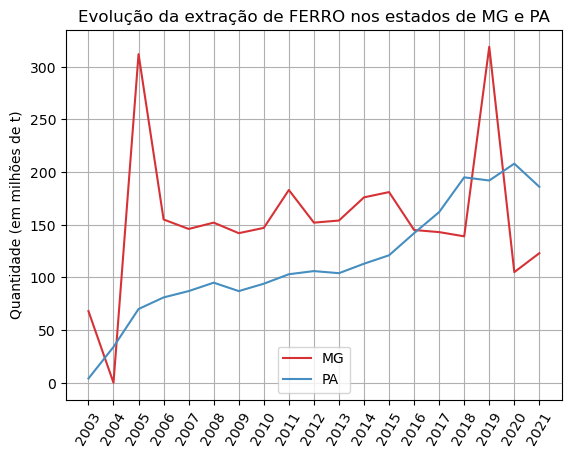

In [48]:
import matplotlib.pyplot as plt
anos = range(2003,2022)

def lista_estado_ano(estado,anos):
  extracao = []
  extracao_ano = 0
  for n in anos:
    for linha in dados:
      if linha[0]==str(n) and linha[9] != '' and linha[9] != 'OURO' and linha[6] == "FERRO" and linha[7] == estado and 't' in linha[10]:
        extracao_ano = extracao_ano + float(linha[9])
    extracao.append(int(extracao_ano/1000000))
    extracao_ano = 0
  return extracao


plt.title("Evolução da extração de FERRO nos estados de MG e PA")
plt.ylabel("Quantidade (em milhões de t)")
plt.grid()
plt.xticks(anos)
plt.plot(anos, lista_estado_ano("MG",anos), label = "MG", color = "#d63236" )
plt.plot(anos, lista_estado_ano("PA",anos), label = "PA", color = "#458ebf")
plt.xticks(anos, rotation=60)
plt.legend(loc="lower center")

Gerar um gráfico de pizza com o percentual no ano de 2021 por tipo de minério extraído
---------

A função plota um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados selecionados ano de 2021.

**Observação:** O parâmetro "relevancia" é um mínimo de recolhimento necessário para que o minério seja incluído no gráfico. Caso contrário, ele vai para a categoria "outros".

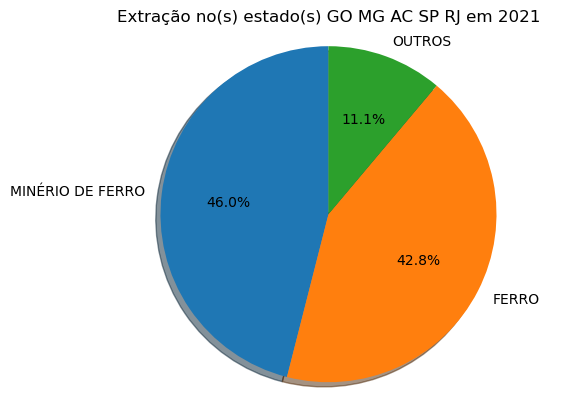

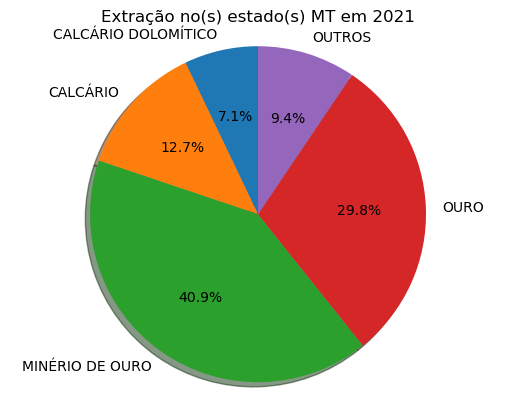

In [49]:
import matplotlib.pyplot as plt

def pizza_graph(estado,relevancia):
  substancias = []
  extracao = []
  extracao_total = 0
  dicionario = {}
  soma_outros = 0
  titulo = ""

  for linha in dados:
    if linha[0] == "2021" and linha[7] in estado and linha[6] not in substancias and float(linha[11]) != 0:
      substancias.append(linha[6])
##
  for substancia in substancias:
    dicionario[substancia] = 0
##
  for linha in dados:
    if linha[0] == "2021" and linha[7] in estado and linha[9] != '':
      dicionario[linha[6]] = dicionario[linha[6]] + float(linha[11])
##
  for n in dicionario:
    extracao_total = extracao_total + dicionario[n]
##
  for substancia in substancias:
    dicionario[substancia] = (dicionario[substancia]/extracao_total*100)
##
  substancias = []
  extracao = []
##
  for n in dicionario:
    if dicionario[n] < relevancia:
      soma_outros = soma_outros + dicionario[n]
    else:
      substancias.append(n)
##
  for n in substancias:
    extracao.append(dicionario[n])
##
  substancias.append("OUTROS")
  extracao.append(soma_outros)
##
  fig1, ax1 = plt.subplots()
  ax1.pie(extracao, labels=substancias, autopct='%1.1f%%',
        shadow=True, startangle=90)
  ax1.axis('equal')
  for n in estado:
    titulo = titulo +" "+n

  plt.title("Extração no(s) estado(s)"+titulo+" em 2021")

pizza_graph(["GO","MG","AC","SP","RJ"],10)
pizza_graph(["MT"],3)